# 1. Defining the problem statement:

Complete the analysis of what sorts of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

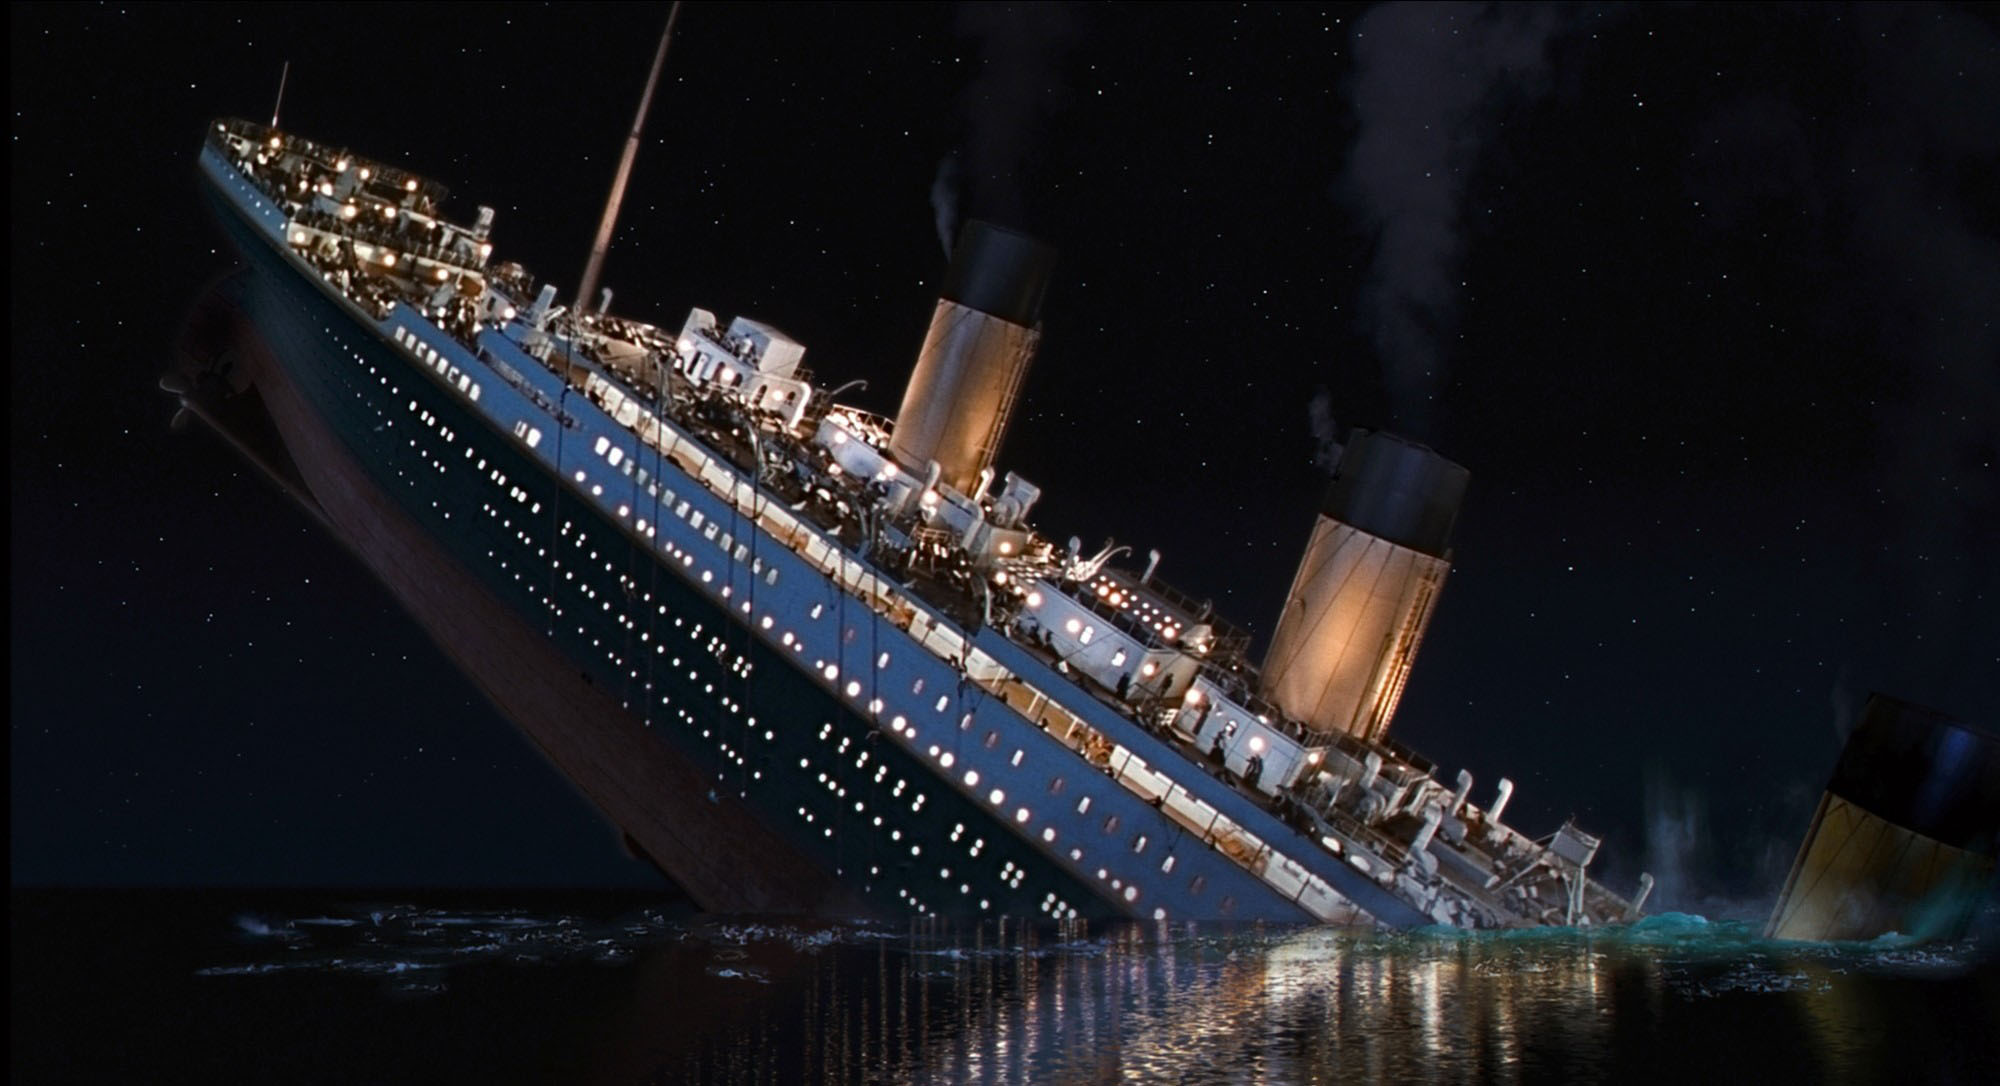

In [1]:
pip install scikit-learn==1.0.1

     ---------------------------------------- 7.2/7.2 MB 81.9 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3



In [1]:
# Import required libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset into jupyter notebook:
df=pd.read_csv('C:\\Users\\suhas.borate\\Desktop\\titanic.csv')

#Setting to display all columns
pd.set_option('display.max_columns', None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


The Survived column is the target variable. 

If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

1.PassengerId: and id given to each traveler on the boat.

2.Survived : Target variable.

3.Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)

4.Name :The Name of the passenger.

5.Sex : The gender of passenger.

6.Age : The Age of passenger in years.

7.SibSp: number of siblings and spouses traveling with the passenger.

8.Parch: number of parents and children traveling with the passenger.

9.Ticket: Ticket number of passenger.

10.Fare : Ticket fare of passenger.

11.Cabin : The cabin number of passenger.

12.embarked: This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)

some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  

Some children travelled only with a nanny, therefore parch=0 for them.  

As well, sometravelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [3]:
df.shape

(1309, 21)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

Here, 'Name_wiki','Age_wiki','Class','Embarked' features are almost same as that of 'Name','Age' and 'Pclass' respectively. 
Therefore, we can drop either one of them. Here, 'Name_wiki','Age_wiki','Class','Boarded' features are dropped.

In [5]:
df.drop(['WikiId','Name_wiki','Age_wiki','Class','Embarked','Lifeboat', 'Body'],axis=1,inplace=True)

In [6]:
df.shape

(1309, 14)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Hometown,Boarded,Destination
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,"New York, New York, US",Cherbourg,"New York, New York, US"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,"Jyväskylä, Finland",Southampton,New York City
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,"Birmingham, West Midlands, England",Southampton,New York City


In [8]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Hometown          5
Boarded           5
Destination       5
dtype: int64

In [9]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Hometown'].fillna(df['Hometown'].mode()[0],inplace=True)
df['Boarded'].fillna(df['Boarded'].mode()[0],inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0],inplace=True)

In [10]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Hometown          0
Boarded           0
Destination       0
dtype: int64

# Extracting Deck from Cabin:

The field Cabin in the data has the form "C85", "C125", where C refers to the deck label. 

We found 8 deck labels: A, B, C, D, E, F, G, T. 
    
We see deck label as a refinement of the passenger's class field since the decks A and B were intended for passengers of the first class, etc.


In [11]:
df['Deck'] = df['Cabin'].str[0]

In [12]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"New York, New York, US",Cherbourg,"New York, New York, US",C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Jyväskylä, Finland",Southampton,New York City,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,NaN


In [14]:
# Replacing 'NaN' values by 'U'(Unknown):
df['Deck'].replace(np.NaN,'U',inplace=True)

In [15]:
df['Deck'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

# Extracting Titles from Passenger's name:

When looking at the passenger names one could wonder how to process them to extract a useful information.

If you look closely at these first examples:

Braund, Mr. Owen Harris

Heikkinen, Miss. Laina

Oliva y Ocana, Dona. Fermina

Peter, Master. Michael J

You will notice that each name has a title in it ! 

This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. 

In that case, we might introduce an additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [16]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [17]:
print (titles)

{'Dr', 'Miss', 'Ms', 'Major', 'Col', 'Mrs', 'Jonkheer', 'Dona', 'the Countess', 'Mlle', 'Don', 'Mr', 'Mme', 'Rev', 'Capt', 'Master', 'Sir', 'Lady'}


In [18]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    
    return df

df = get_titles()

This function parses the names and extract the titles. Then, it maps the titles to categories of titles. We selected :

Officer

Royalty

Mr

Mrs

Miss

Master

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",U,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"New York, New York, US",Cherbourg,"New York, New York, US",C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Jyväskylä, Finland",Southampton,New York City,U,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",C,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,U,Mr


In [20]:
df['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [21]:
pd.set_option('display.max_rows', None)
df[df['Title']=='Mr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",U,Mr
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,U,Mr
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,"Cork, Ireland",Queenstown,New York City,U,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",E,Mr
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,"St Austell, Cornwall, England",Southampton,New York City,U,Mr
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,"Kisa, Östergötland, Sweden",Southampton,"Winnipeg, Manitoba, Canada",U,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,"Harrow, London, England",Southampton,"Chicago, Illinois, US",U,Mr
20,21,0.0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,"Liverpool, Merseyside, England, UK",Southampton,"Montreal, Quebec, Canada",U,Mr
21,22,1.0,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,"London, England, UK",Southampton,"Toronto, Ontario, Canada",D,Mr
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,"New Britain, Connecticut, US",Southampton,"New Britain, Connecticut, US",A,Mr


# Processing Family:

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).

This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.

In [22]:
def process_family():
    
    global df
    # introducing a new feature : the size of families (including the passenger)
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
    return df

df = process_family()

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",U,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"New York, New York, US",Cherbourg,"New York, New York, US",C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Jyväskylä, Finland",Southampton,New York City,U,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",C,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,U,Mr,1


In [24]:
# create a list of our conditions
conditions = [
    (df['FamilySize'] == 1),
    (df['FamilySize'] >= 2) & (df['FamilySize'] <= 4),
    (df['FamilySize'] >= 5)
    ]

# create a list of the values we want to assign for each condition
values = ['Single', 'Small_Family', 'Large_Family']

# create a new column and use np.select to assign values to it using our lists as arguments
df['FamilyType'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck,Title,FamilySize,FamilyType
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",U,Mr,2,Small_Family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"New York, New York, US",Cherbourg,"New York, New York, US",C,Mrs,2,Small_Family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Jyväskylä, Finland",Southampton,New York City,U,Miss,1,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",C,Mrs,2,Small_Family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,U,Mr,1,Single


This function introduces 4 new features:

FamilySize : the total number of relatives including the passenger (him/her)self.

Sigle : a boolean variable that describes families of size = 1

SmallFamily : a boolean variable that describes families of 2 <= size <= 4

LargeFamily : a boolean variable that describes families of 5 < size

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Hometown,Boarded,Destination,Deck,Title,FamilySize,FamilyType
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",U,Mr,2,Small_Family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"New York, New York, US",Cherbourg,"New York, New York, US",C,Mrs,2,Small_Family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"Jyväskylä, Finland",Southampton,New York City,U,Miss,1,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",C,Mrs,2,Small_Family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"Birmingham, West Midlands, England",Southampton,New York City,U,Mr,1,Single


In [26]:
df.drop(['Name','Ticket','Hometown','Destination'],axis=1,inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,1,0.0,3,male,22.0,1,0,7.2500,Southampton,U,Mr,2,Small_Family
1,2,1.0,1,female,38.0,1,0,71.2833,Cherbourg,C,Mrs,2,Small_Family
2,3,1.0,3,female,26.0,0,0,7.9250,Southampton,U,Miss,1,Single
3,4,1.0,1,female,35.0,1,0,53.1000,Southampton,C,Mrs,2,Small_Family
4,5,0.0,3,male,35.0,0,0,8.0500,Southampton,U,Mr,1,Single


In [28]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [29]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
Fare             0
Boarded          0
Deck             0
Title            1
FamilySize       0
FamilyType       0
dtype: int64

# Processing the ages:

We have seen that, the Age variable missing 263 values.This is a large number (20% of the dataset). 

Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To understand why, let's group our dataset by sex, Title and passenger class and for each subset compute the median age.


In [30]:
df1= df.groupby(['Sex','Pclass','Title'])
df1_median = df1.median()
df1_median = df1_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [31]:
df1_median.head(100)

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,45.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,20.0
5,female,2,Mrs,30.0
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,6.0
9,male,1,Mr,41.5


This dataframe will help us impute missing age values based on different criteria.

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

For example:

If the passenger is female, from Pclass 1, and from royalty the median age is 40.5. If the passenger is male, from Pclass 3, with a Mr title, the median age is 26. Let's create a function that fills in the missing age in combined based on these different attributes.

In [32]:
def fill_age(row):
    condition = (
        (df1_median['Sex'] == row['Sex']) & 
        (df1_median['Title'] == row['Title']) & 
        (df1_median['Pclass'] == row['Pclass'])
    ) 
    return df1_median[condition]['Age'].values[0]


def process_age():
    global df
    # a function that fills the missing values of the Age variable
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

df = process_age()

In [33]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Boarded          0
Deck             0
Title            1
FamilySize       0
FamilyType       0
dtype: int64

In [34]:
df['Title'].fillna(df['Title'].mode()[0],inplace=True)
df['Survived'].fillna(df['Survived'].mode()[0],inplace=True)

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Boarded        0
Deck           0
Title          0
FamilySize     0
FamilyType     0
dtype: int64

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,1,0.0,3,male,22.0,7.2500,Southampton,U,Mr,2,Small_Family
1,2,1.0,1,female,38.0,71.2833,Cherbourg,C,Mrs,2,Small_Family
2,3,1.0,3,female,26.0,7.9250,Southampton,U,Miss,1,Single
3,4,1.0,1,female,35.0,53.1000,Southampton,C,Mrs,2,Small_Family
4,5,0.0,3,male,35.0,8.0500,Southampton,U,Mr,1,Single


In [37]:
df['Survived'] = df['Survived'].astype('int')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,1,0,3,male,22.0,7.2500,Southampton,U,Mr,2,Small_Family
1,2,1,1,female,38.0,71.2833,Cherbourg,C,Mrs,2,Small_Family
2,3,1,3,female,26.0,7.9250,Southampton,U,Miss,1,Single
3,4,1,1,female,35.0,53.1000,Southampton,C,Mrs,2,Small_Family
4,5,0,3,male,35.0,8.0500,Southampton,U,Mr,1,Single


In [39]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical Features:")
print(cate_cols)

Categorical Features:
['Sex', 'Boarded', 'Deck', 'Title', 'FamilyType']


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cate_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,1,0,3,1,22.0,7.2500,3,8,2,2,2
1,2,1,1,0,38.0,71.2833,1,2,3,2,2
2,3,1,3,0,26.0,7.9250,3,8,1,1,1
3,4,1,1,0,35.0,53.1000,3,2,3,2,2
4,5,0,3,1,35.0,8.0500,3,8,2,1,1


In [42]:
# Save dataframe into csv file:
df.to_csv('titanic_processed_data.csv')

In [43]:
df.drop('PassengerId',axis=1,inplace=True)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,0,3,1,22.0,7.2500,3,8,2,2,2
1,1,1,0,38.0,71.2833,1,2,3,2,2
2,1,3,0,26.0,7.9250,3,8,1,1,1
3,1,1,0,35.0,53.1000,3,2,3,2,2
4,0,3,1,35.0,8.0500,3,8,2,1,1


# Splitting of Dataset:

In [45]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [46]:
x.head()

,Pclass,Sex,Age,Fare,Boarded,Deck,Title,FamilySize,FamilyType
0,3,1,22.0,7.2500,3,8,2,2,2
1,1,0,38.0,71.2833,1,2,3,2,2
2,3,0,26.0,7.9250,3,8,1,1,1
3,1,0,35.0,53.1000,3,2,3,2,2
4,3,1,35.0,8.0500,3,8,2,1,1


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=77)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (916, 9)
x_test shape: (393, 9)
y_train shape: (916,)
y_test shape: (393,)


# Model Building(GradientBoostingClassifier):

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [50]:
import sklearn
print(sklearn.__version__)

1.0.1


In [51]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred_test=gb.predict(x_test)
pred_train = gb.predict(x_train)
print ("Trainng Accuracy:",accuracy_score(y_train, pred_train)*100,'%')
print ("Testing Accuracy:",accuracy_score(y_test, pred_test)*100,'%')

Trainng Accuracy: 85.37117903930131 %
Testing Accuracy: 82.69720101781171 %


In [53]:
import pickle
filename = 'titanic_GB_model.pkl'
pickle.dump(gb, open(filename, 'wb'))

In [54]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8269720101781171


In [55]:
import numpy as np

point_X = x_test[0:5]

print(point_X)

#point_X = np.expand_dims(point_X, axis=0)
#print(point_X)
#point_y = test_y[0]

np.savetxt("test_point_titanic.csv", point_X, delimiter=",")

      Pclass  Sex   Age    Fare  Boarded  Deck  Title  FamilySize  FamilyType
777        3    0   5.0  12.475        3     8      1           1           1
346        2    0  40.0  13.000        3     8      1           1           1
312        2    0  26.0  26.000        3     8      3           3           2
1221       2    0  48.0  36.750        3     8      3           3           2
201        3    1  26.0  69.550        3     8      2          11           0


# Confusion Matrix:

In [58]:
print(confusion_matrix(y_test, pred_test))

[[277  17]
 [ 51  48]]


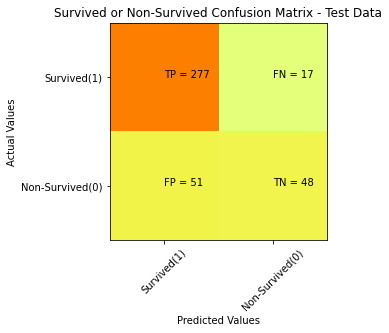

In [59]:
plt.clf()
plt.imshow(confusion_matrix(y_test, pred_test), interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Survived(1)','Non-Survived(0)']
plt.title('Survived or Non-Survived Confusion Matrix - Test Data')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix(y_test, pred_test)[i][j]))
plt.show()

# Classification Report:

In [60]:
print (classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       294
           1       0.74      0.48      0.59        99

    accuracy                           0.83       393
   macro avg       0.79      0.71      0.74       393
weighted avg       0.82      0.83      0.81       393



# Cross-Validation:

In [61]:
from sklearn.model_selection import cross_val_score

In [64]:
cvs = cross_val_score(gb, x, y, cv = 5)
print ('Cross Validation Score for ',gb, ' model is :', cvs.mean()*100,'%')
print (' ')

Cross Validation Score for  GradientBoostingClassifier()  model is : 77.76490889415342 %
 
